# RStan in CoCalc (Kernel: "R-Project")

https://mc-stan.org/users/interfaces/rstan

Going through https://github.com/stan-dev/rstan/wiki/RStan-Getting-Started with slight changes for CoCalc.

Be aware, that the initial compilation takes about 2.5 gb of RAM!

In [14]:
# switch to PNG images, because the default of SVG produces very large files
options(jupyter.plot_mimetypes = c('image/png'))

In [1]:
pkgbuild::has_build_tools(debug = TRUE)

Trying to compile a simple C file


Running /usr/lib/R/bin/R CMD SHLIB foo.c
gcc -std=gnu99 -I/usr/share/R/include -DNDEBUG      -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-AitvI6/r-base-3.4.4=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -g  -c foo.c -o foo.o
g++ -shared -L/usr/lib/R/lib -Wl,-Bsymbolic-functions -Wl,-z,relro -o foo.so foo.o -L/usr/lib/R/lib -lR


TRUE

In [2]:
packageDescription("rstan")$Version

'2.18.2'

In [3]:
require(rstan)

Loading required package: rstan


Loading required package: ggplot2


Loading required package: StanHeaders


rstan (Version 2.18.2, GitRev: 2e1f913d3ca3)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)


In [4]:
# make sure to only use one core!
options(mc.cores = 1)

In [5]:
rstan_options(auto_write = TRUE)

In [6]:
schools8 <- "
data {
  int<lower=0> J;         // number of schools 
  real y[J];              // estimated treatment effects
  real<lower=0> sigma[J]; // standard error of effect estimates 
}
parameters {
  real mu;                // population treatment effect
  real<lower=0> tau;      // standard deviation in treatment effects
  vector[J] eta;          // unscaled deviation from mu by school
}
transformed parameters {
  vector[J] theta = mu + tau * eta;        // school treatment effects
}
model {
  target += normal_lpdf(eta | 0, 1);       // prior log-density
  target += normal_lpdf(y | theta, sigma); // log-likelihood
}"

In [7]:
schools_dat <- list(J = 8,
                    y = c(28, 8, -3, 7, -1, 1, 18, 12),
                    sigma = c(15, 10, 16, 11, 9, 11, 10, 18)
                   )

In [8]:
fit <- stan(model_code = schools8, data = schools_dat)


SAMPLING FOR MODEL '77851864eaef144f4a34884224755b9c' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.3e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.039216 seconds (Warm-up)
Chain 1:                0.038589 seconds (Sampling)


Warning message:
“There were 3 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”

Warning message:
“Examine the pairs() plot to diagnose sampling problems
”

In [15]:
print(fit)

Inference for Stan model: 77851864eaef144f4a34884224755b9c.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

           mean se_mean   sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
mu         7.86    0.12 5.11  -2.45   4.61   7.90  11.15  17.70  1857    1
tau        6.54    0.13 5.38   0.29   2.44   5.31   9.20  20.25  1599    1
eta[1]     0.40    0.01 0.95  -1.51  -0.24   0.43   1.05   2.18  4156    1
eta[2]     0.01    0.01 0.86  -1.69  -0.57   0.00   0.59   1.77  4138    1
eta[3]    -0.21    0.01 0.92  -2.05  -0.82  -0.21   0.40   1.62  5337    1
eta[4]    -0.01    0.01 0.90  -1.78  -0.59   0.00   0.56   1.78  4212    1
eta[5]    -0.35    0.01 0.88  -2.07  -0.94  -0.35   0.23   1.41  4105    1
eta[6]    -0.20    0.01 0.87  -1.84  -0.78  -0.21   0.37   1.58  4185    1
eta[7]     0.33    0.01 0.87  -1.46  -0.22   0.34   0.92   2.00  4145    1
eta[8]     0.06    0.01 0.92  -1.79  -0.56   0.07   0.69   1.81  4672   

'pars' not specified. Showing first 10 parameters by default.


ci_level: 0.8 (80% intervals)


outer_level: 0.95 (95% intervals)


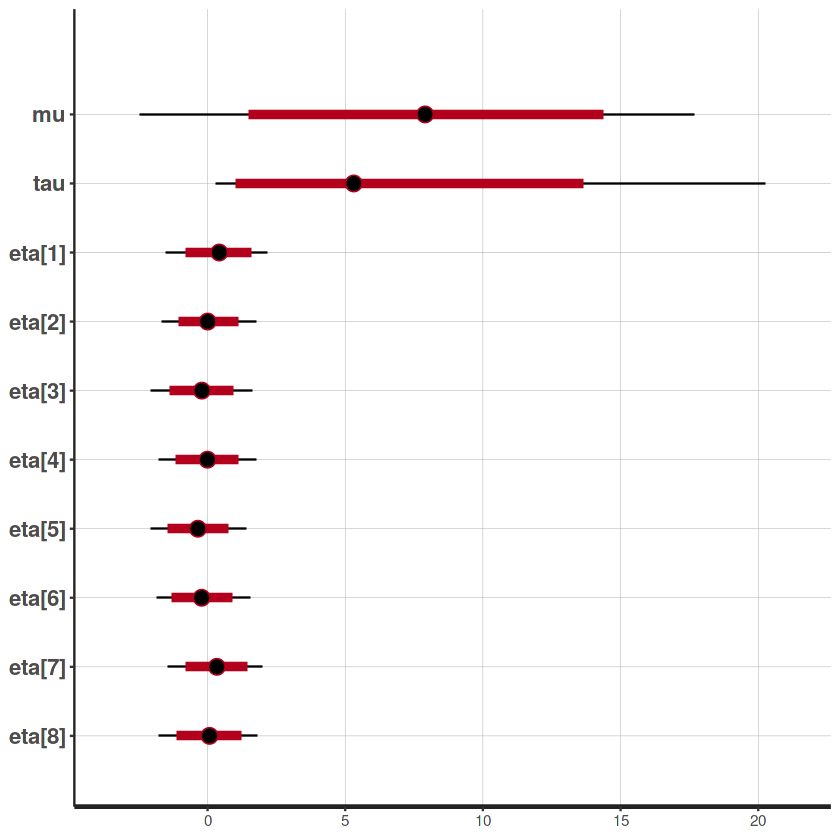

In [16]:
plot(fit)

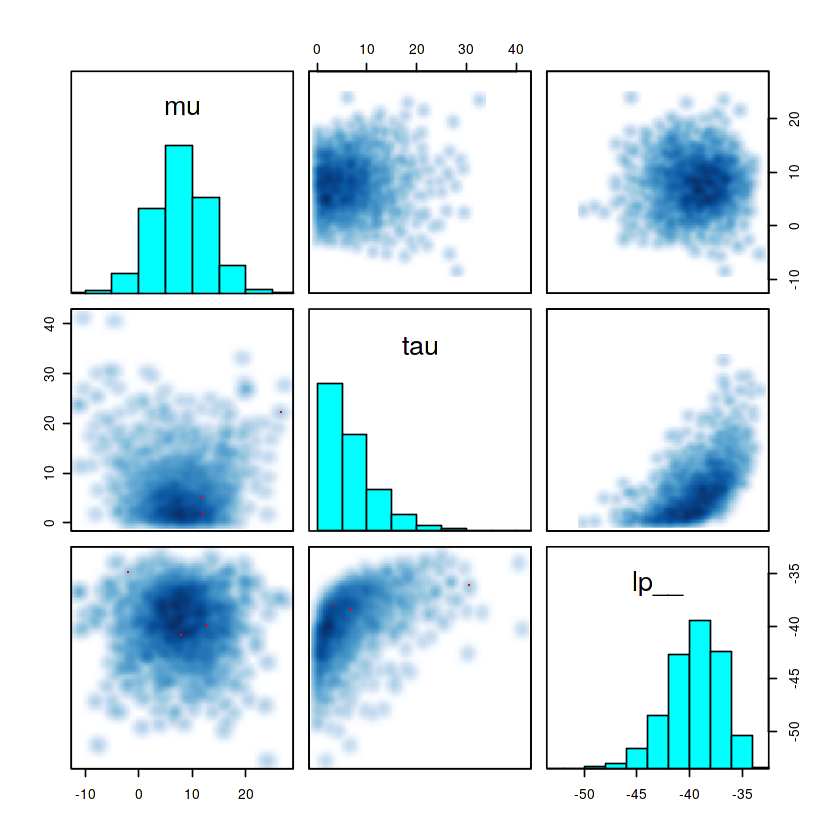

In [17]:
pairs(fit, pars = c("mu", "tau", "lp__"))

In [18]:
### return an array of three dimensions: iterations, chains, parameters 
a <- extract(fit, permuted = FALSE) 
a[1:10]

5.39618350392046 
 0.686046105579853 
 12.2207867201285 
 -0.178791454000923 
 11.0161502498223 
 5.34968907655748 
 6.93197826928302 
 5.68811738463849 
 10.7213844859233 
 1.68269235068929

In [19]:
### use S3 functions on stanfit objects
a2 <- as.array(fit)
m <- as.matrix(fit)
d <- as.data.frame(fit)
d[1:10]

mu tau eta[1] eta[2] eta[3] eta[4] eta[5] eta[6] eta[7] eta[8] 
 
 5.3961835 2.3685829 -0.5567546 0.56348542 2.01522095 0.169342623 0.50181571 -0.208145098 -1.1217359 1.91946027 
 0.6860461 4.1367774 -1.0802441 0.42963362 1.99876081 0.887993281 1.20276288 -0.240802263 -0.9450431 2.28220115 
 12.2207867 0.5989557 -1.3517758 -1.50313373 -1.26931261 0.090716307 -0.95829548 0.395428980 -0.1213342 -1.29870404 
 -0.1787915 1.2749352 -0.3583841 -0.59696618 0.99716760 -0.890219718 -0.92933774 -1.007676229 -0.7057188 0.57632729 
 11.0161502 1.7843548 -0.2232293 0.04109137 0.45007966 -0.438513460 -1.30454790 -1.048199309 -0.4806426 -0.64408486 
 5.3496891 4.6905826 -0.9736077 0.54301954 0.86772042 0.500115637 -0.45801685 -1.452564628 2.3787168 0.17005574 
 6.9319783 5.3027711 1.3647102 0.08618644 -2.15494141 -1.745484748 0.68330836 0.570792391 -0.3023055 0.43175128 
 5.6881174 1.6164703 -1.8529150 0.21515663 0.91532076 0.189292082 -0.14087814 -0.067037906 -0.1208038 0.62964552 
 10.7213845 8.9996004 -1.9365577 0.13085916 1.77016072 -0.003299785 -0.86071803 0.473711690 0.2658253 1.45396565 
 1.6826924 0.1691010 1.1240211 0.39374889 0.42215091 -0.482868850 -1.04063432 0.049669334 -1.4084845 0.45945727 
 14.7804757 3.8119272 -0.6679941 -0.05020627 -0.13868226 1.116695069 0.01027008 -0.685884853 0.6550268 0.23060747 
 10.1087903 2.4634371 -2.5762966 -0.68724688 -1.86960612 -0.279329749 -1.26457829 -2.805158102 0.1750718 -0.09148728 
 24.0811459 1.8356451 -2.9145325 1.11611710 -0.94643350 0.319774308 1.34581207 0.165335433 -0.2260273 1.09373800 
 -7.4851807 6.6397290 3.3438356 -1.06011093 0.87519429 0.473639239 -1.70560951 -0.529120226 0.4812363 -1.04239608 
 -0.3013699 13.9068516 2.3604325 0.85464726 -0.22416280 0.651395582 -0.30136386 0.343451168 2.0920786 0.78442915 
 11.4391144 11.6837877 -1.3756533 -0.70986594 -0.54579781 -0.644570508 -0.48813750 0.009779451 -0.1877553 0.52216926 
 13.4169475 14.3643945 1.8847251 -0.18508920 0.17401990 0.182930297 -1.17503408 -1.308482204 0.7070368 -0.13166273 
 8.7048968 6.7834231 0.4628655 -0.08120005 -0.21238590 0.162767090 -0.95412743 -0.427018160 -1.0112350 -1.44880478 
 6.6540698 4.9487404 1.3854939 0.96121890 -0.26556847 0.195825372 0.49529749 0.328893927 1.0500572 1.55579236 
 -2.5387590 16.4575783 0.3717619 0.50999642 0.96570505 -0.157000076 0.47046243 -0.050642907 1.3414407 1.46431963 
 -2.5387590 16.4575783 0.3717619 0.50999642 0.96570505 -0.157000076 0.47046243 -0.050642907 1.3414407 1.46431963 
 16.3980514 13.5989202 1.4541320 -0.39967342 -1.20405390 0.098571305 -1.23094236 -0.824934046 -0.1621034 -1.10090304 
 14.4847117 13.7989773 0.2092602 0.12059297 -1.49481657 -0.689796320 -0.37982431 -0.958498537 -0.3457315 -0.13843692 
 12.3469263 2.0297331 0.4319855 -1.19744527 0.24561412 -0.072166641 -1.15542862 0.548836712 0.6966082 0.01814399 
 12.4287394 0.9902857 1.1037543 -1.27847109 -0.43530026 0.494160859 0.26845793 0.157840373 0.6658382 0.60015112 
 10.6641490 2.5483680 -0.7839886 -0.77121420 -1.35230236 0.549695398 -0.04613958 -1.733963274 0.2421487 0.28274715 
 10.6199698 0.2835570 -0.2917623 0.19324122 -0.46244387 0.782276174 0.25997656 -0.539997086 0.4743405 -0.29992826 
 8.8833887 0.5482013 -0.1314144 -0.48854279 -0.34184416 -0.112882179 1.03627536 0.698999798 1.2983051 -0.47556639 
 3.3082875 1.5641125 0.4397713 -0.21005412 0.99517117 -1.022978212 -0.55439391 1.317178312 -0.1755756 -0.26944904 
 7.6743617 7.6847889 0.6286669 -0.77196167 0.06247897 -1.503346589 -0.66778958 0.600880524 1.4895017 0.61987915 
 ⋮ ⋮ ⋮ ⋮ ⋮ ⋮ ⋮ ⋮ ⋮ ⋮ 
 9.886547 8.7464343 1.8607923 -0.155244942 -1.92769611 -1.1736117 -1.05415111 0.86365921 -0.78806516 0.36300414 
 11.364010 4.7500489 -1.1666333 0.007529395 -0.61787671 -1.4561706 -1.60222744 -0.10814093 -0.85543032 0.83673123 
 12.922030 2.4673147 -0.8138930 -0.638404194 -1.16309929 -1.3853016 -2.07147697 -0.11207489 -0.99742529 0.98280938 
 9.004027 3.4505590 -0.5446533 0.185183857 0.19112569 -2.2194860 -0.16581317 1.00831837 -0.60580365 1.42806526 
 8.532313 